In [ ]:
#Loading libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Assignment /car_prices.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Preprocessing**

In [ ]:
print ('The Car data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The Car data has 558837 rows and 16 columns


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df.iloc[1]


year                                               2015
make                                                Kia
model                                           Sorento
trim                                                 LX
body                                                SUV
transmission                                  automatic
vin                                   5xyktca69fg561319
state                                                ca
condition                                           5.0
odometer                                         9393.0
color                                             white
interior                                          beige
seller                          kia motors america  inc
mmr                                             20800.0
sellingprice                                    21500.0
saledate        Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
Name: 1, dtype: object

In [ ]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)


Total number of categorical columns are  11
There names are as follows:  ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [ ]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)


Total number of numerical columns are  1
There names are as follows:  ['year']


In [ ]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  4
There name are as follow:  ['condition', 'odometer', 'mmr', 'sellingprice']


**Descriptive Analysis**

In [ ]:
df.describe()


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


**Null and Nan values**

In [ ]:
df.isnull().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [ ]:
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)

In [ ]:
df['make'].fillna(df['make'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['trim'].fillna(df['trim'].mode()[0], inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
df['Final Price'] = df[['mmr', 'sellingprice']].mean(axis=1)

In [ ]:
df=df.drop(columns=['vin','seller','mmr', 'sellingprice','saledate'])
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,Final Price
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,21000.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,21150.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,30950.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,27625.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,66500.0


**Count of unique occurences of every value in all categorical value**

In [ ]:
for features in ['make','model','trim','body','transmission','state','condition','color','interior']:
    print('{} column has unique values ={}'.format(features,set(df[features].unique())))


make column has unique values ={'Kia', 'Cadillac', 'Porsche', 'Geo', 'Suzuki', 'Infiniti', 'Scion', 'BMW', 'Volkswagen', 'Lotus', 'Bentley', 'Jaguar', 'Hyundai', 'FIAT', 'Land Rover', 'Mazda', 'MINI', 'Isuzu', 'Maserati', 'Lexus', 'Jeep', 'Mitsubishi', 'Mercury', 'Lamborghini', 'Oldsmobile', 'Acura', 'Buick', 'Audi', 'Dodge', 'Lincoln', 'Chrysler', 'Mercedes-Benz', 'Rolls-Royce', 'HUMMER', 'Aston Martin', 'Subaru', 'Volvo', 'Saab', 'Ram', 'Toyota', 'Daewoo', 'Chevrolet', 'smart', 'Plymouth', 'Tesla', 'GMC', 'Honda', 'Pontiac', 'Ferrari', 'Fisker', 'Nissan', 'Saturn', 'Ford'}
model column has unique values ={'CL', 'Wrangler', 'E-150', 'Tiburon', 'C/K 2500 Series', 'TL', 'Tahoe Limited/Z71', 'Camry', 'Exige', 'F-TYPE', '500-Class', 'Grand Cherokee', 'G5', 'G8', 'CLA-Class', 'Montero', 'Colorado', 'Villager', 'Silverado 3500', 'Eldorado', 'ES 300', 'Spark EV', 'XK-Series', 'Ram Van', 'Mark LT', 'H2', 'Continental GT', 'CR-Z', 'Flex', 'Firebird', 'Commander', 'Escape Hybrid', 'RX 350', 'SL

In [ ]:
pd.DataFrame(df.groupby('make').agg({'model': pd.Series.unique, 'trim': pd.Series.unique, 'body': pd.Series.unique}).reset_index())

,make,model,trim,body
0,Acura,"[ILX, MDX, TSX, TL, RDX, ZDX, RSX, RL, CL, Int...","[Technology Package, Advance and Entertainment...","[Sedan, SUV, Hatchback, Coupe, TSX Sport Wagon..."
1,Aston Martin,"[V8 Vantage, DB9, Rapide]","[N400 Roadster, Volante, Base]","[Convertible, Sedan, Coupe, coupe, convertible]"
2,Audi,"[A4, A6, Q5, A3, SQ5, S5, A8, TTS, S4, A7, A5,...","[2.0T Premium Plus quattro, 3.0T Prestige quat...","[Sedan, SUV, Coupe, Convertible, Wagon, Hatchb..."
3,BMW,"[3 Series, 6 Series Gran Coupe, M5, 6 Series, ...","[328i SULEV, 650i, Base, 528i, xDrive35i, sDri...","[Sedan, Convertible, SUV, Coupe, Hatchback, Wa..."
4,Bentley,"[Continental GT Speed, Continental Flying Spur...","[Base, V8]","[Coupe, Sedan, Convertible, coupe, sedan, conv..."
5,Buick,"[Enclave, LaCrosse, Rendezvous, LeSabre, Centu...","[Leather Group, CXL, CXS, CX, Custom, Base, Li...","[SUV, Sedan, Minivan, Coupe, suv, sedan, minivan]"
6,Cadillac,"[ELR, SRX, Escalade, CTS Coupe, Escalade ESV, ...","[Base, Luxury, Premium, Platinum Edition, Perf...","[Coupe, SUV, CTS Coupe, Sedan, CTS-V Coupe, Co..."
7,Chevrolet,"[Cruze, Camaro, Impala, Suburban, Malibu, Silv...","[1LT, LT, LS, LTZ, 2LT, LT Fleet, LS Fleet, Wo...","[Sedan, Convertible, Coupe, SUV, Crew Cab, Hat..."
8,Chrysler,"[200, 300, Town and Country, Sebring, PT Cruis...","[LX, S V6, Touring, Limited, C, Base, Touring-...","[Sedan, Minivan, Convertible, Wagon, SUV, Hatc..."
9,Daewoo,[Nubira],[SE],[Sedan]


**Data Visualization**

Text(0.5, 1.0, 'transmission type')

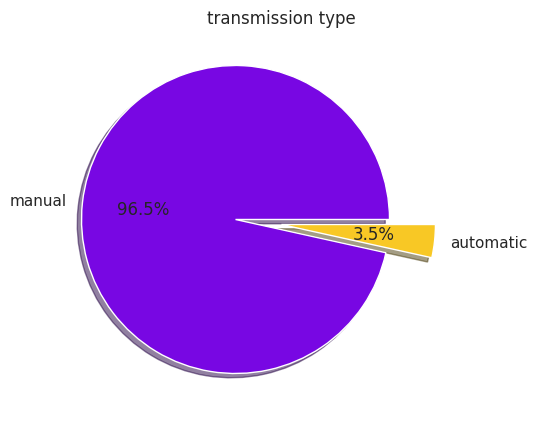

In [ ]:
myexplode = [0.3, 0]
plt.figure(figsize=[5,5])
plt.pie(df['transmission'].value_counts(),labels=['manual', 'automatic'],autopct='%1.1f%%',shadow=True,explode=myexplode,colors=['#7807E3','#F8C825'])
plt.title('transmission type')


96.5% of the cars have Transmission type manual and very few about 3.5% of the cars have Transmission type automatic.

[Text(0, 0, 'Kia'),
 Text(1, 0, 'BMW'),
 Text(2, 0, 'Volvo'),
 Text(3, 0, 'Nissan'),
 Text(4, 0, 'Chevrolet'),
 Text(5, 0, 'Audi'),
 Text(6, 0, 'Ford'),
 Text(7, 0, 'Cadillac'),
 Text(8, 0, 'Acura'),
 Text(9, 0, 'Lexus'),
 Text(10, 0, 'Hyundai'),
 Text(11, 0, 'Buick'),
 Text(12, 0, 'Infiniti'),
 Text(13, 0, 'Jeep'),
 Text(14, 0, 'Mercedes-Benz'),
 Text(15, 0, 'Mitsubishi'),
 Text(16, 0, 'Mazda'),
 Text(17, 0, 'MINI'),
 Text(18, 0, 'Land Rover'),
 Text(19, 0, 'Lincoln'),
 Text(20, 0, 'Jaguar'),
 Text(21, 0, 'Volkswagen'),
 Text(22, 0, 'Toyota'),
 Text(23, 0, 'Subaru'),
 Text(24, 0, 'Scion'),
 Text(25, 0, 'Porsche'),
 Text(26, 0, 'Dodge'),
 Text(27, 0, 'FIAT'),
 Text(28, 0, 'Chrysler'),
 Text(29, 0, 'Ferrari'),
 Text(30, 0, 'Honda'),
 Text(31, 0, 'GMC'),
 Text(32, 0, 'Ram'),
 Text(33, 0, 'smart'),
 Text(34, 0, 'Bentley'),
 Text(35, 0, 'Pontiac'),
 Text(36, 0, 'Saturn'),
 Text(37, 0, 'Maserati'),
 Text(38, 0, 'Mercury'),
 Text(39, 0, 'HUMMER'),
 Text(40, 0, 'Saab'),
 Text(41, 0, 'Suzuki')

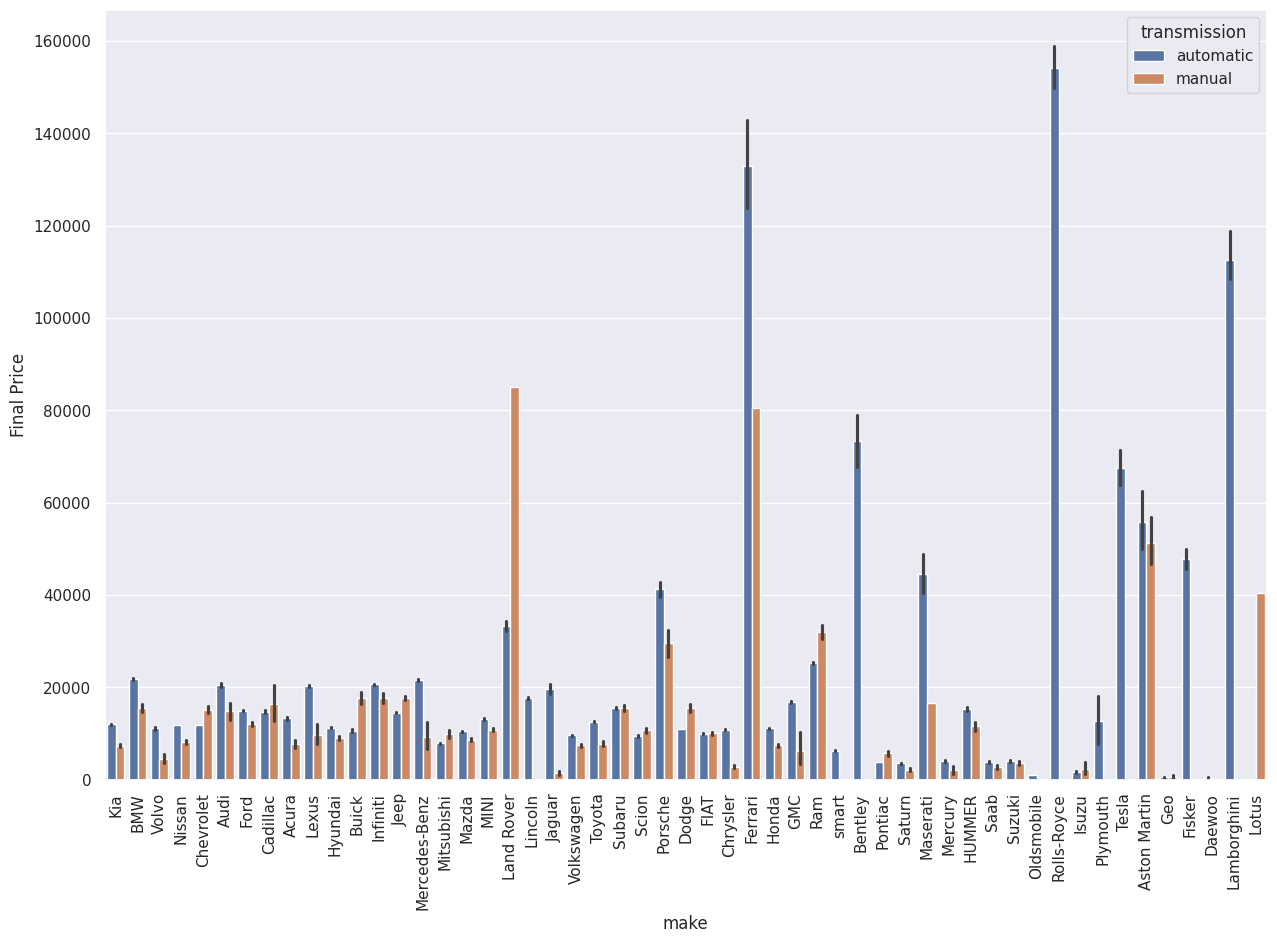

In [ ]:
sns.set(rc={'figure.figsize': (15, 10)})
ax = sns.barplot(x='make', y='Final Price', hue='transmission', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Some brands, such as Lincoln, Bentley, Rolls-Royce, Plymouth, Tesla, Fisher, and Lamborghini, exclusively sell automatic cars.

Expensive car brands in the dataset include Ferrari, Rolls-Royce, and Lamborghini.

Automatic cars tend to be more expensive than manual models across the dataset.

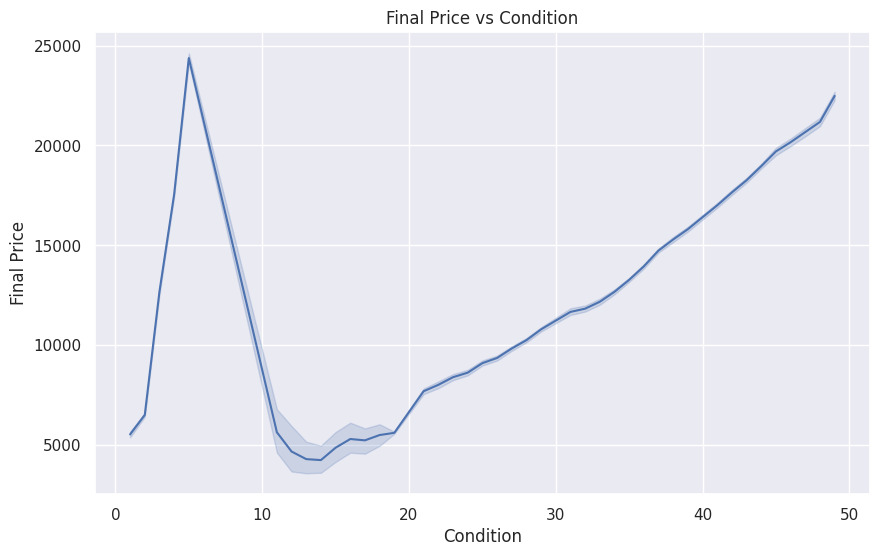

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='Final Price', data=df)
plt.title('Final Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Final Price')
plt.show()


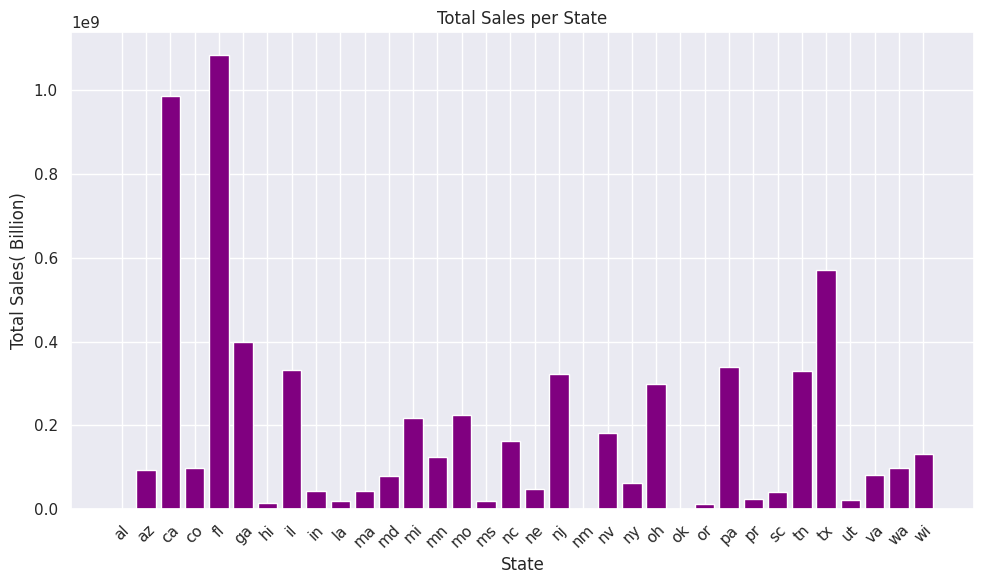

In [ ]:
total_sales_per_state = df.groupby('state')['Final Price'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_state['state'], total_sales_per_state['Final Price'], color='Purple')
plt.xlabel('State')
plt.ylabel('Total Sales( Billion)')
plt.title('Total Sales per State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Before Encoding
a = ['year','make',	'model','trim','body','transmission','state','condition','odometer','color','interior','Final Price']
for i in a:
    print(df[i])

0         2015
1         2015
2         2014
3         2015
4         2014
          ... 
558831    2011
558833    2012
558834    2012
558835    2015
558836    2014
Name: year, Length: 472434, dtype: int64
0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558831       BMW
558833       Ram
558834       BMW
558835    Nissan
558836      Ford
Name: make, Length: 472434, dtype: object
0                     Sorento
1                     Sorento
2                    3 Series
3                         S60
4         6 Series Gran Coupe
                 ...         
558831               5 Series
558833                   2500
558834                     X5
558835                 Altima
558836                  F-150
Name: model, Length: 472434, dtype: object
0                  LX
1                  LX
2          328i SULEV
3                  T5
4                650i
             ...     
558831           528i
558833    Power Wagon
558834      xDri

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.make = le.fit_transform(df.make)
df.model = le.fit_transform(df.model)
df.trim = le.fit_transform(df.trim)
df.body = le.fit_transform(df.body)
df.transmission = le.fit_transform(df.transmission)
df.state = le.fit_transform(df.state)
df.color = le.fit_transform(df.color)
df.interior = le.fit_transform(df.interior)

In [ ]:
#After encoding
for i in a:
    print(df[i])

0         2015
1         2015
2         2014
3         2015
4         2014
          ... 
558831    2011
558833    2012
558834    2012
558835    2015
558836    2014
Name: year, Length: 472434, dtype: int64
0         24
1         24
2          3
3         51
4          3
          ..
558831     3
558833    41
558834     3
558835    36
558836    14
Name: make, Length: 472434, dtype: int64
0         637
1         637
2           8
3         575
4          33
         ... 
558831     25
558833      6
558834    722
558835     63
558836    256
Name: model, Length: 472434, dtype: int64
0          819
1          819
2          254
3         1213
4          336
          ... 
558831     317
558833     927
558834    1490
558835     103
558836    1395
Name: trim, Length: 472434, dtype: int64
0         35
1         35
2         36
3         36
4         36
          ..
558831    36
558833    11
558834    35
558835    76
558836    38
Name: body, Length: 472434, dtype: int64
0         0
1         0


In [ ]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,Final Price
0,2015,24,637,819,35,0,2,5.0,16639.0,17,1,21000.0
1,2015,24,637,819,35,0,2,5.0,9393.0,17,0,21150.0
2,2014,3,8,254,36,0,2,45.0,1331.0,7,1,30950.0
3,2015,51,575,1213,36,0,2,41.0,14282.0,17,1,27625.0
4,2014,3,33,336,36,0,2,43.0,2641.0,7,1,66500.0


**Data Exploration**

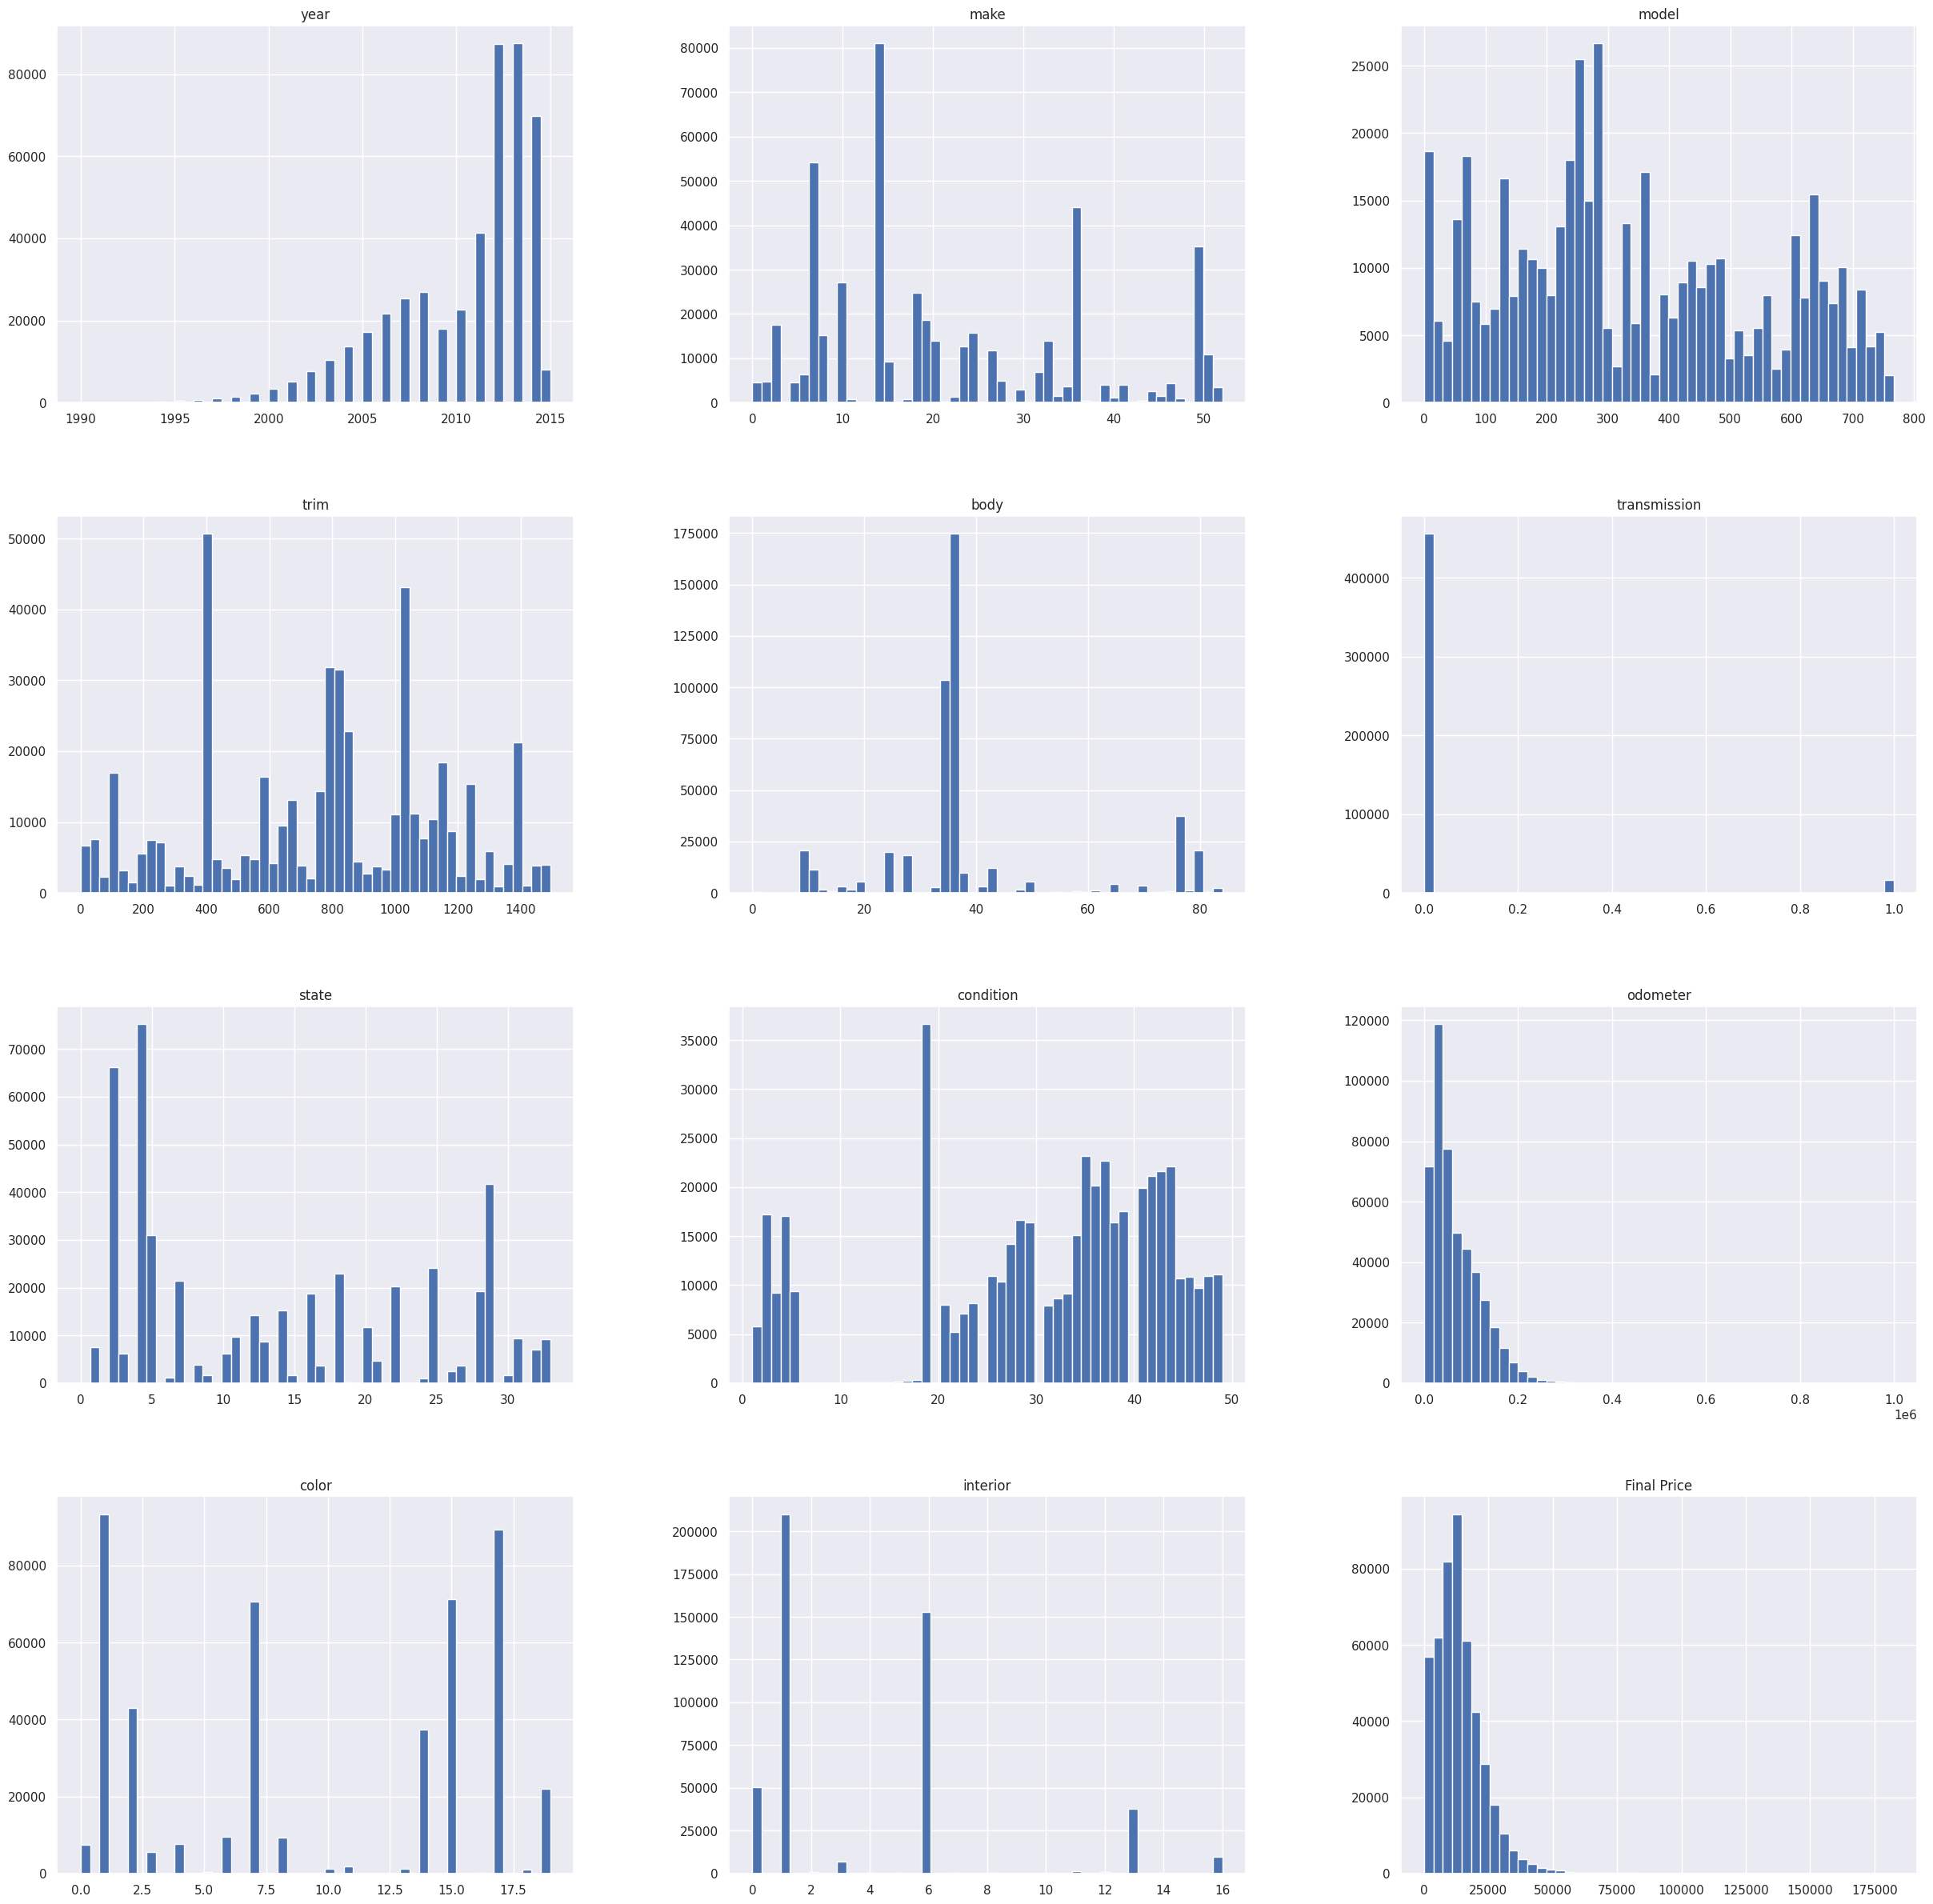

In [ ]:
# Distribution in attributes
df.hist(bins=50, figsize=(30,30))
plt.show()

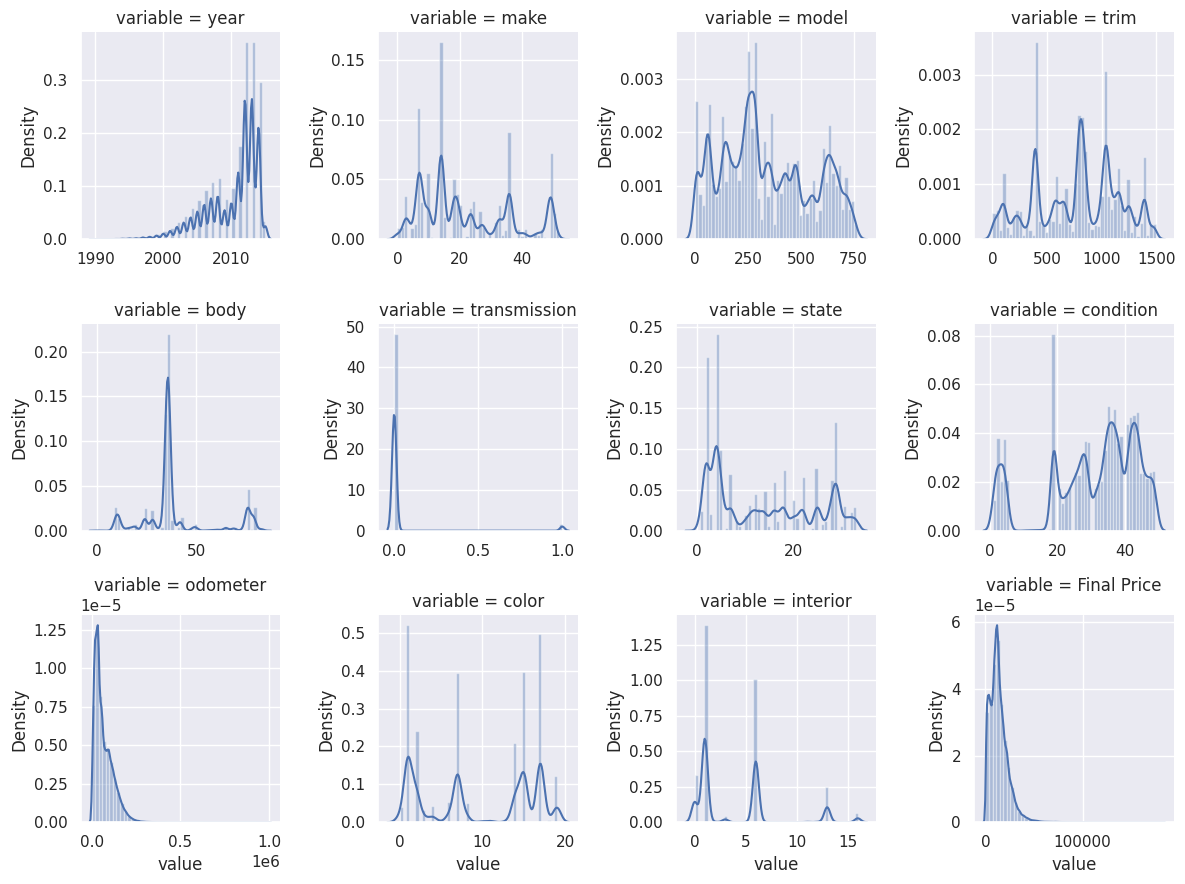

In [ ]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

**distribution of the target variable**

In [ ]:
#+ve skewed
df['Final Price'].skew()


2.0401565396339776

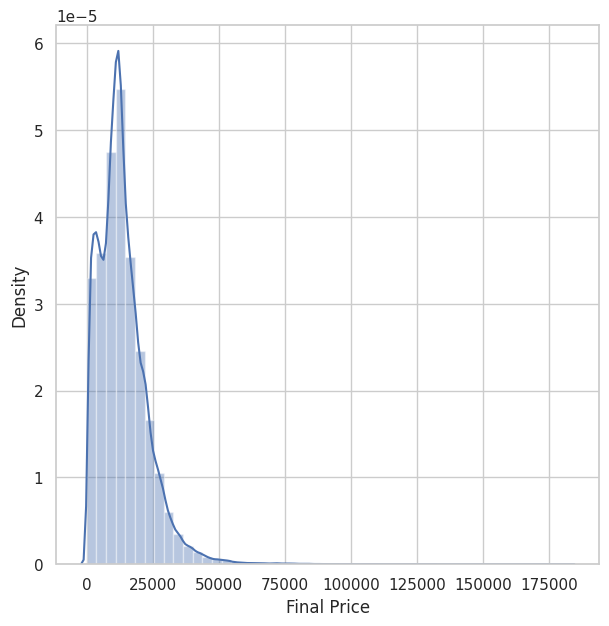

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
sns.distplot(df['Final Price'])
plt.show()

The target variable is positively skewed.A normally distributed (or close to normal)

From the above graph we can observe that price of the most of the cars is between the range 0–25000 according to dataset.

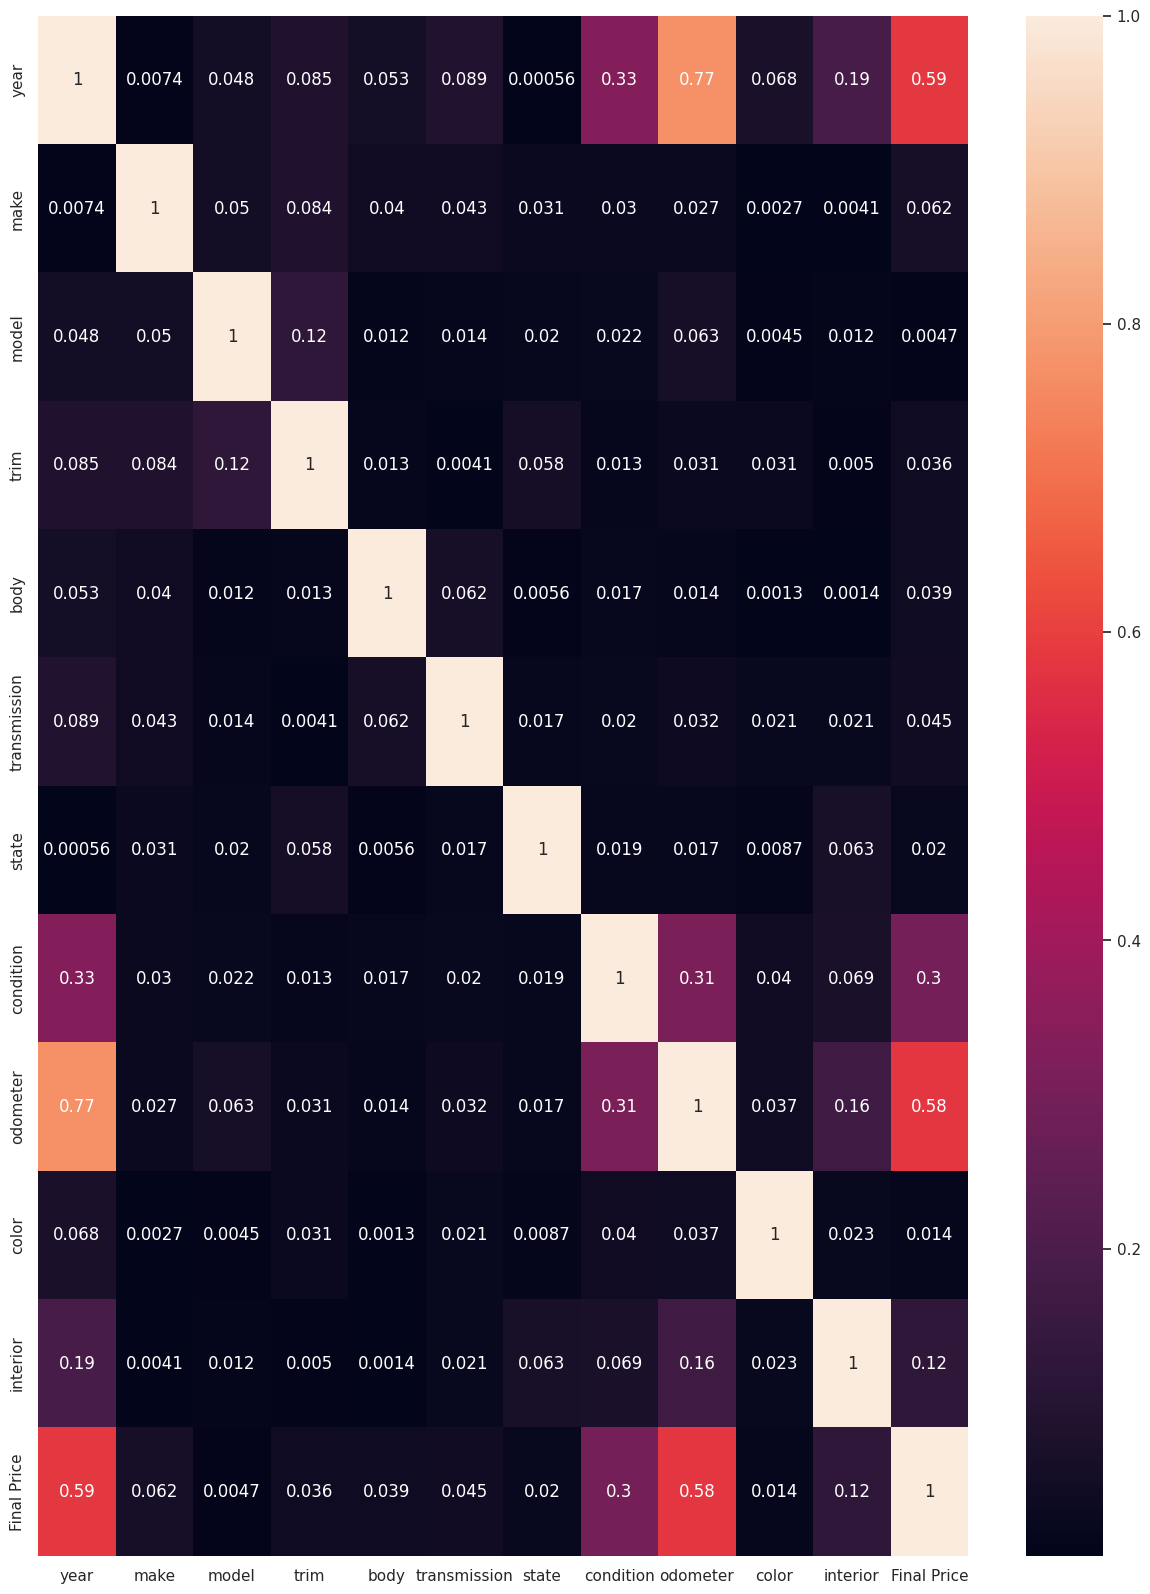

In [ ]:
#correlation plot
sns.set(rc = {'figure.figsize':(15,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()


In [ ]:
print (corr['Final Price'].sort_values(ascending=False), '\n')


Final Price     1.000000
year            0.585429
odometer        0.581781
condition       0.298178
interior        0.123401
make            0.062100
transmission    0.045160
body            0.038782
trim            0.036118
state           0.020182
color           0.014427
model           0.004734
Name: Final Price, dtype: float64 



Based on our observation, we found that the features 'model', 'trim', and 'body' have a large number of unique values but show very little correlation with the target variable. Consequently, we have decided to drop these features from the dataset.

In [ ]:
df = df.drop([ 'model', 'trim', 'body'], axis=1)

<Axes: >

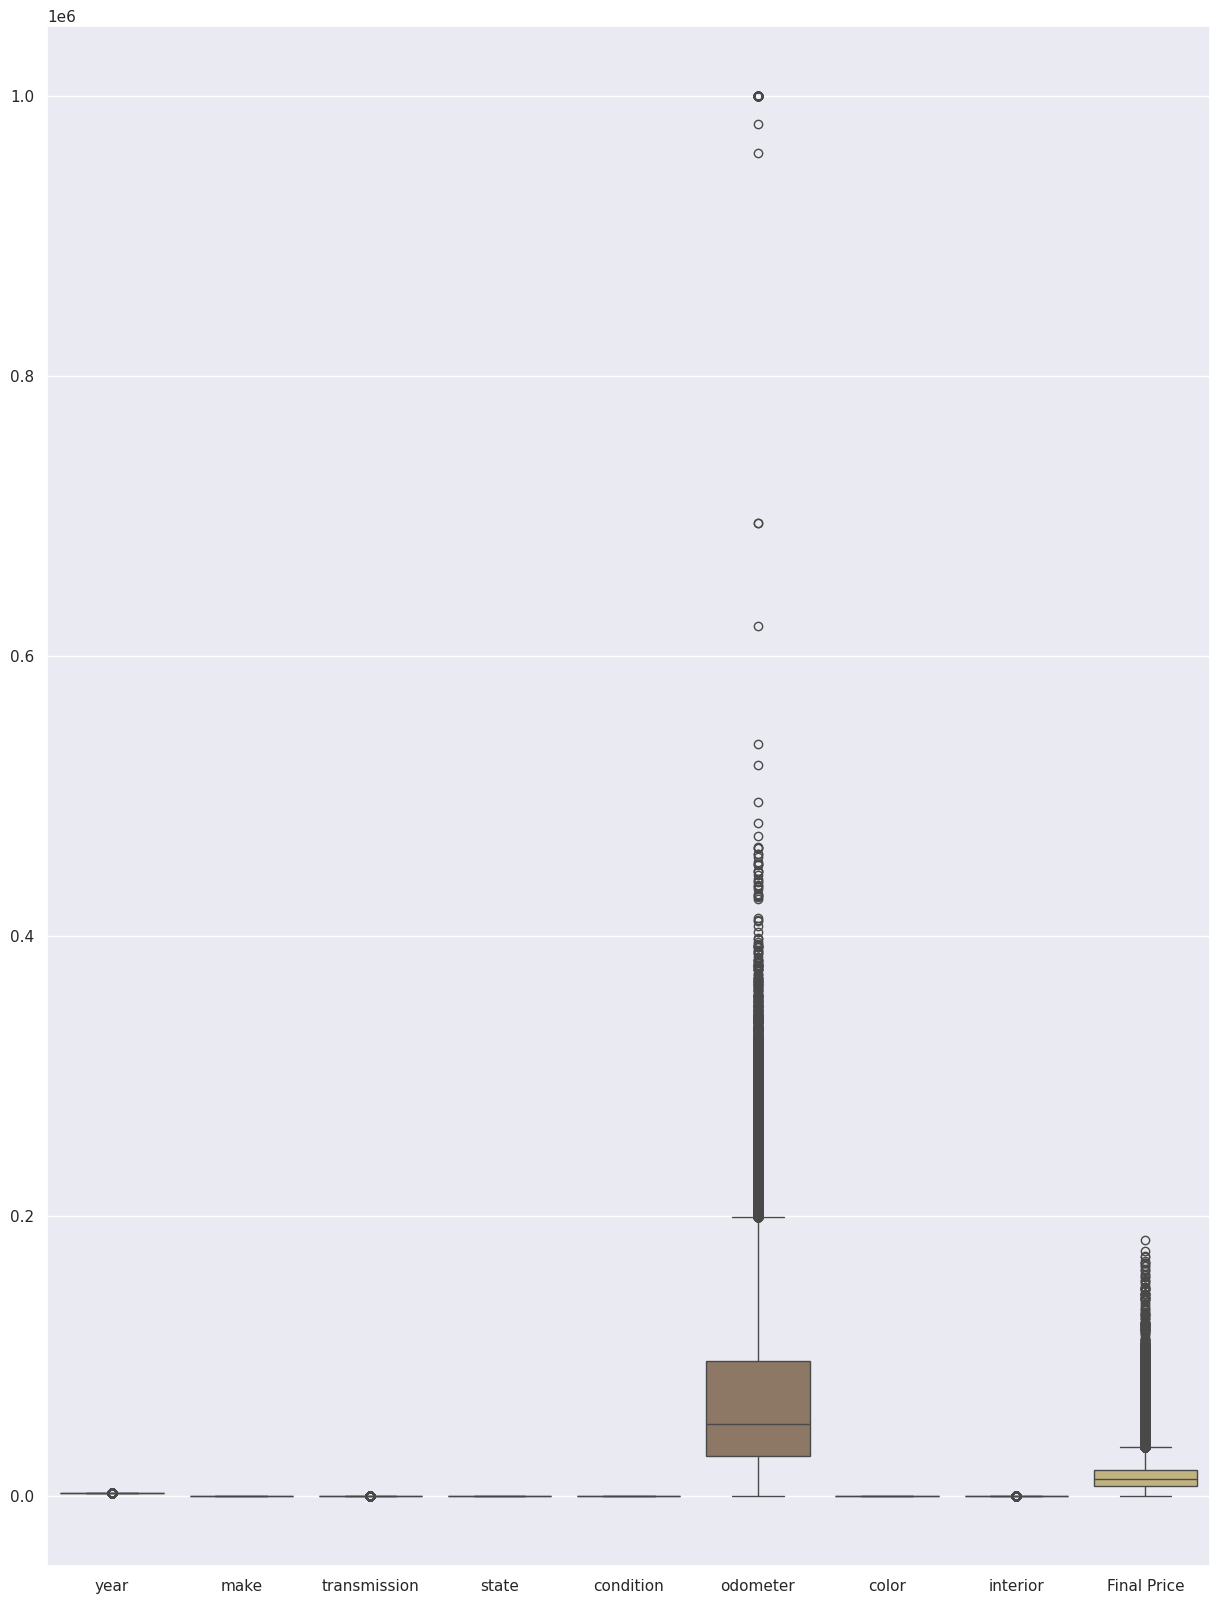

In [ ]:
features = df.columns.tolist()
sns.boxplot(data=df)

**Data Preparation**

In [ ]:
target = 'Final Price'
X = df.drop(target,axis=1)
y = df[target]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472434 entries, 0 to 558836
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472434 non-null  int64  
 1   make          472434 non-null  int64  
 2   transmission  472434 non-null  int64  
 3   state         472434 non-null  int64  
 4   condition     472434 non-null  float64
 5   odometer      472434 non-null  float64
 6   color         472434 non-null  int64  
 7   interior      472434 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 32.4 MB


In [ ]:
y

0         21000.0
1         21150.0
2         30950.0
3         27625.0
4         66500.0
           ...   
558831    21550.0
558833    30500.0
558834    31900.0
558835    13100.0
558836    28150.0
Name: Final Price, Length: 472434, dtype: float64

In [ ]:
 X.shape, y.shape


((472434, 8), (472434,))

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
X.shape, y.shape

((472434, 8), (472434, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((377947, 8), (94487, 8), (377947, 1), (94487, 1))

**Model Training**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
preprocessor = make_pipeline(KNNImputer(n_neighbors=3), StandardScaler())

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Random Forest Regression': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

In [ ]:
for model_name, model in models.items():
    # Pipeline creation
    pipeline = make_pipeline(preprocessor, model)

    # Pipeline fitting to the training data
    pipeline.fit(X_train, y_train)

    # Evaluation of the pipeline on the test data
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Printing the mean squared error
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - r2 score: {r2:.2f}')
    print("-------------------------------------------------------------------")

Linear Regression - Mean Squared Error: 54161776.83
Linear Regression - r2 score: 0.40
-------------------------------------------------------------------
Ridge Regression - Mean Squared Error: 54161776.29
Ridge Regression - r2 score: 0.40
-------------------------------------------------------------------
Lasso Regression - Mean Squared Error: 54161651.22
Lasso Regression - r2 score: 0.40
-------------------------------------------------------------------
Random Forest Regression - Mean Squared Error: 26140722.11
Random Forest Regression - r2 score: 0.71
-------------------------------------------------------------------
KNeighborsRegressor - Mean Squared Error: 40257188.54
KNeighborsRegressor - r2 score: 0.55
-------------------------------------------------------------------
DecisionTreeRegressor - Mean Squared Error: 50469389.77
DecisionTreeRegressor - r2 score: 0.44
-------------------------------------------------------------------


In [ ]:
model=RandomForestRegressor()

In [ ]:
scaler = StandardScaler()
scaled_train_data=scaler.fit_transform(X_train)
scaled_test_data=scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [1, 5, 10],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)

In [ ]:
gs.fit(scaled_train_data,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1, 5, 10]},
             verbose=3)

In [ ]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 10}

In [ ]:
gs.best_score_

0.7064259733202667

In [ ]:
best_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=10
)

In [ ]:
best_model.fit(scaled_train_data,y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10, n_estimators=10)

In [ ]:
y_pred=best_model.predict(scaled_test_data)

In [ ]:
mean_squared_error(y_test, y_pred)

26573737.20185528

In [ ]:
r2_score(y_test, y_pred)*100

70.57263065174956

**Save The Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, 'Car_Sales_rf.joblib')
joblib.dump(scaler, 'Car_Sales_scaler.joblib')

['Car_Sales_scaler.joblib']